# Question 2 [L-fold Cross Validation]

#### For the second question, we are required to implement a L-fold cross validation function for the KNN regressor implemented in question 1 of the assignment. L-fold cross validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called 'L' that refers to the number of groups that a given data sample is to be split into. 

#### We begin with loading the data from the previous question and the knn function as well.

In [24]:
library(reshape2)
library(ggplot2)

In [25]:

data <- read.csv('Task1A_train.csv')
data_test <- read.csv('Task1A_test.csv')
training_data <- data['x1']
training_label <- data['y']
test_data <- data_test['x1']
test_label <- data_test['y']

KNN function from question 1.

In [26]:

# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K, distance = 'euclidean'){
  ## count number of train samples
  train.len <- nrow(train.data)
  
  ## count number of test samples
  test.len <- nrow(test.data)
  
  ## calculate distances between samples
  dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
  
  ## for each test sample...
  test.label<- c()
  #test.data <- data.frame(test.data)
  #test.data<-data.frame(x1 = c(test.data))
  
  
  for (i in 1:test.len){
    ### ...find its K nearest neighbours from training sampels...
    nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
    
    ###... and calculate the predicted labels according to the majority vote
    test.label[i]<- (mean(train.label[nn,1]))
  }
  
  ## return the class labels as output
  return (test.label)
}

Below we implement the L-fold cross validation function. The function takes 4 parameters which is the training data, the training label, number of neighbors 'k' and the number of folds i.e. numFold (L). The function does the following steps,
- Creates a dataframe to store the errors for different values of k.
- Creates L equally sized folds of the data.
- For each fold, subset the data to training and testing and run knn and record the error on these folds.
- We then return the mean of these errors back to the miss dataframe.

In [27]:

cv<- function(train.data, train.label, K, numFold=10){
  #Randomly shuffle the data
  miss <- data.frame('K'=1:10, 'Error'=rep(0,10))
  #train.data<-train.data[sample(nrow(train.data)),]
  
  #Create 10 equally size folds
  folds <- cut(seq(1,nrow(train.data)),breaks=numFold,labels=FALSE)
  
  #Perform 10 fold cross validation
  for(i in 1:numFold){
    #Segement your data by fold using the which() function 
    testIndexes <- which(folds==i,arr.ind=TRUE)
    testData <- train.data[testIndexes, ]
    testLabel<- train.label[testIndexes, ]
    trainData <- train.data[-testIndexes, ]
    trainLabel<- train.label[-testIndexes, ]
    trainData<-data.frame(trainData)
    colnames(trainData) <- c("x1")
    trainLabel<-data.frame(y<-trainLabel)
    colnames(trainLabel) <- c("y")
    testData<-data.frame(x1<-testData)
    colnames(testData) <- c("x1")
    knn(trainData,trainLabel,trainData,K,distance='euclidean')
    miss[i,'Error'] <-  sqrt(sum((testLabel - knn(trainData, trainLabel, testData, K=K))**2)/nrow(testData))
    
  }
  return(mean(miss$Error))
}




The code below stores the test error for 1.2....15 values of K by passing them through the cross validation function. As in KNN, we use RMSE here as well for our error metric.

In [28]:
miss <- data.frame('K'=1:15, 'Error'=rep(0,15))
for(K in 1:15)
{
  miss[K,'Error']=cv(training_data,training_label,K,10)

  
}

In [29]:
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'RMSE')

In [33]:
miss.m

K,type,RMSE
1,Error,0.9064516
2,Error,0.9248274
3,Error,1.0076324
4,Error,0.9307078
5,Error,0.9602899
6,Error,0.9295822
7,Error,1.0283564
8,Error,0.9793313
9,Error,1.0941474
10,Error,1.0688254


The below code generates the plot for test error various values of K.

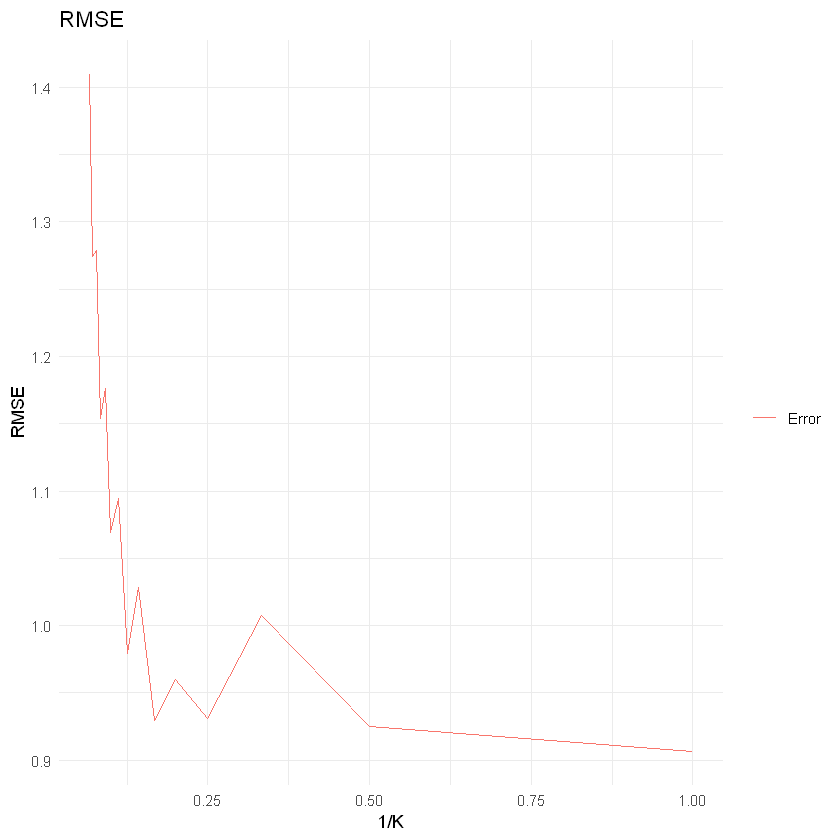

In [32]:
ggplot(data=miss.m, aes(x=1/K, y=RMSE, color=type)) + geom_line() +
  scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
  ggtitle("RMSE")
#knn(training_data,training_label,test_data,K=4,distance='euclidean')

As we can see from the plot, with a small value of k, our training data error is very small due to overfitting of data due to very low bias. But as the size of k increases, the complexity of the model increases, which will lead to an increase on the error in the training data but will lead to a decrease of the error in test data. Also, if we use a very high value of 'k', as in the first question would lead to underfitting of the data leading to a high error on the training data again. The optimal value of k lies somewhere around 8 neighbors(i.e. 1/k = 0.25). This region is where we can find a low test region for the model fitted on the data.